In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Connect to google drive`
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataframes
crp_data = pd.read_csv('drive/MyDrive/Biofluency/data/crp_results.csv')
oura_data = pd.read_csv('drive/MyDrive/Biofluency/data/oura_data.csv')
display(crp_data.head())
display(oura_data.head())

,date,hs-CRP
0,2024-02-25,0.4
1,2024-02-22,0.4
2,2024-02-20,0.4
3,2024-02-19,0.5
4,2024-02-18,0.5


,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2023-08-01,89.0,93.0,98.0,64.0,97.0,89.0,91.0,79.0,30870.0,...,0,90.0,100.0,100.0,80.0,72.0,97.0,98.0,88.0,100.0
1,2023-08-02,90.0,90.0,100.0,75.0,96.0,87.0,83.0,100.0,30210.0,...,0,90.0,100.0,95.0,94.0,65.0,100.0,94.0,91.0,100.0
2,2023-08-03,79.0,79.0,81.0,69.0,95.0,82.0,78.0,67.0,27300.0,...,0,78.0,74.0,92.0,90.0,69.0,89.0,85.0,90.0,30.0
3,2023-08-04,83.0,76.0,93.0,47.0,98.0,90.0,91.0,100.0,26490.0,...,0,89.0,84.0,93.0,93.0,66.0,95.0,100.0,98.0,90.0
4,2023-08-05,65.0,54.0,62.0,63.0,90.0,81.0,97.0,27.0,20850.0,...,0,67.0,39.0,81.0,73.0,73.0,100.0,41.0,85.0,77.0


In [5]:
# Merge dataframes, keeping only dates that are present in both
merged_df = pd.merge(crp_data, oura_data, on='date', how='inner')
display(merged_df.head())

,date,hs-CRP,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2024-02-25,0.4,78.0,74.0,78.0,87.0,97.0,88.0,91.0,36.0,...,0,80.0,70.0,78.0,83.0,80.0,100.0,68.0,88.0,93.0
1,2024-02-22,0.4,76.0,78.0,78.0,57.0,95.0,81.0,62.0,75.0,...,0,76.0,64.0,81.0,80.0,81.0,96.0,77.0,85.0,50.0
2,2024-02-20,0.4,94.0,95.0,100.0,96.0,99.0,85.0,91.0,94.0,...,0,92.0,100.0,88.0,93.0,90.0,100.0,100.0,81.0,100.0
3,2024-02-19,0.5,78.0,74.0,61.0,95.0,100.0,91.0,78.0,54.0,...,0,86.0,69.0,83.0,84.0,90.0,100.0,100.0,88.0,91.0
4,2024-02-18,0.5,74.0,76.0,70.0,64.0,99.0,84.0,94.0,17.0,...,1,71.0,59.0,83.0,78.0,84.0,92.0,61.0,77.0,45.0


In [13]:
# Define the predictor variables (X) and the target variable (y), c-reactive protein value
X = merged_df.drop(['hs-CRP','date','Bedtime Start', 'Bedtime End'], axis=1)  # Replace 'target_variable' with the actual name of your target column
y = merged_df['hs-CRP']  # Replace 'target_variable' with the actual name of your target column

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [34]:
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Make predictions
y_pred = rf.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [37]:
rmse

0.05144576432192122

In [41]:
# Examine feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

                        Feature  Importance
0                   Sleep Score    0.062235
37         Medium Activity Time    0.048550
46       Activity Balance Score    0.044966
30                Activity Burn    0.044966
17                 Sleep Timing    0.044640
38           High Activity Time    0.043011
43         Previous Night Score    0.039427
20                  Average HRV    0.039101
22  Temperature Trend Deviation    0.038123
39                Non-wear Time    0.035842
49            HRV Balance Score    0.033887
11           REM Sleep Duration    0.030303
40                  Average MET    0.029000
24               Activity Score    0.026719
25            Stay Active Score    0.025415
18   Average Resting Heart Rate    0.025090
12         Light Sleep Duration    0.023460
6           Sleep Latency Score    0.023460
33  Equivalent Walking Distance    0.023135
32                        Steps    0.021505
9                Total Bedtime     0.021505
14               Restless Sleep 

In [22]:
# Plot results
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Actual vs. Predicted')

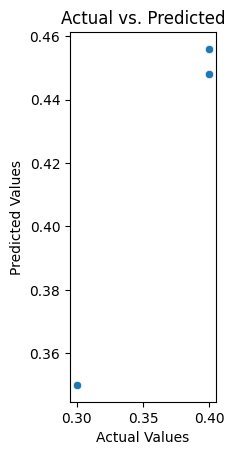

In [39]:
# Visualize the results
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')

Text(0.5, 1.0, 'Feature Importances')

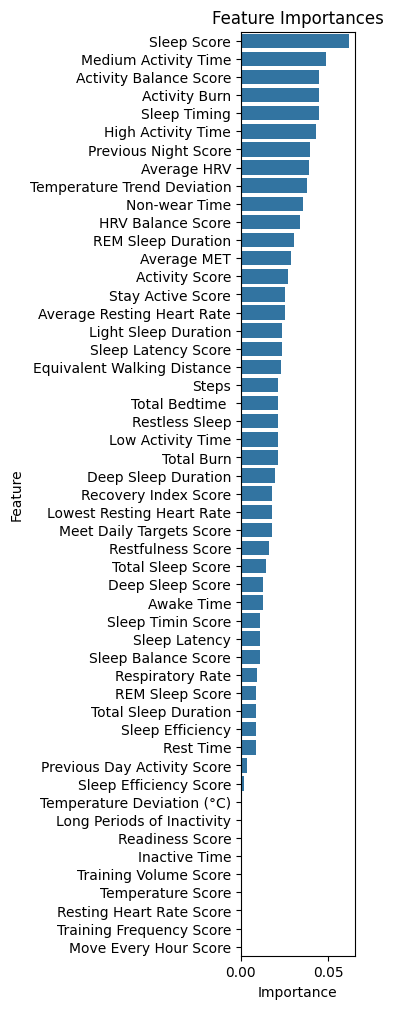

In [40]:
# Feature Importance Plot
plt.figure(figsize=(5, 12))
plt.subplot(1, 3, 3)
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')